In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [80]:
file_path = "train.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

In [81]:
df.info()
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
dt                  0
Цена на арматуру    0
dtype: int64


In [82]:
df["dt"] = pd.to_datetime(df["dt"])
df.set_index("dt", inplace=True)

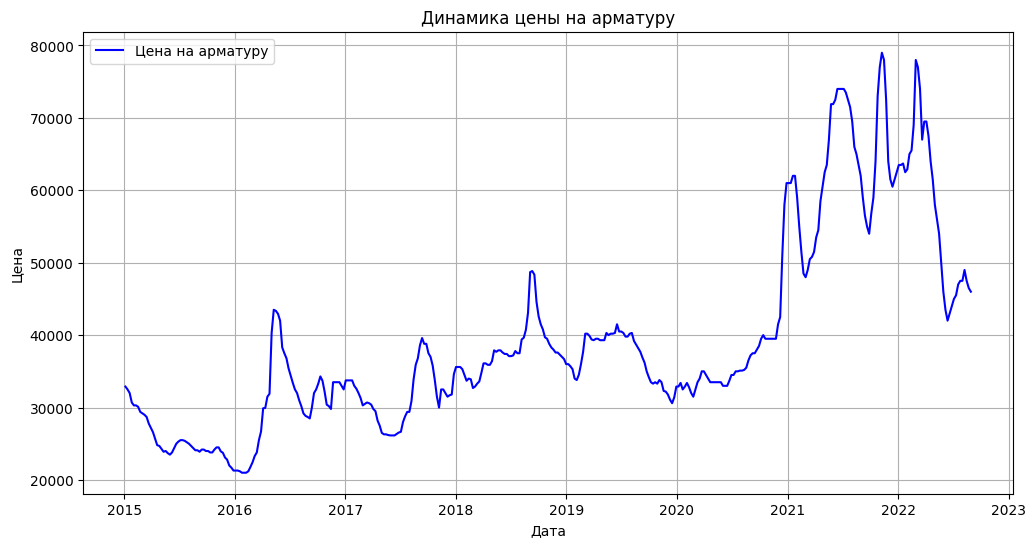

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Цена на арматуру"], label="Цена на арматуру", color="b")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.title("Динамика цены на арматуру")
plt.legend()
plt.grid()
plt.show()


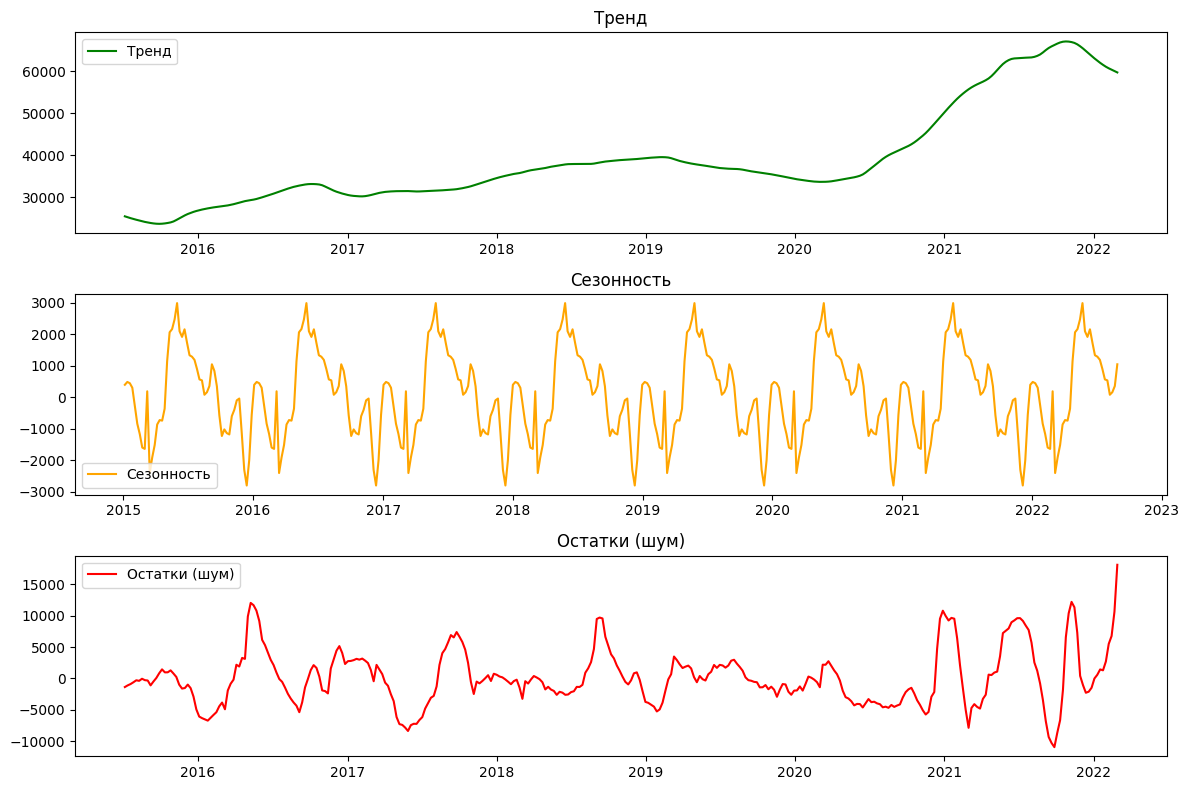

In [84]:
decomposition = seasonal_decompose(df["Цена на арматуру"], model="additive", period=52)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label="Тренд", color="g")
plt.title("Тренд")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label="Сезонность", color="orange")
plt.title("Сезонность")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label="Остатки (шум)", color="r")
plt.title("Остатки (шум)")
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
df["lag_1"] = df["Цена на арматуру"].shift(1)
df["lag_2"] = df["Цена на арматуру"].shift(2)
df["lag_7"] = df["Цена на арматуру"].shift(7)
df["rolling_mean_7"] = df["Цена на арматуру"].rolling(window=1).mean()
df["year"] = df.index.year
df["month"] = df.index.month
df["week"] = df.index.isocalendar().week
df["day_of_week"] = df.index.dayofweek
df.dropna(inplace=True)

In [86]:
features = ["lag_1", "lag_2", "lag_7", "rolling_mean_7", "year", "month", "week", "day_of_week"]
target = "Цена на арматуру"
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [87]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
y_pred = model.predict(X_test)


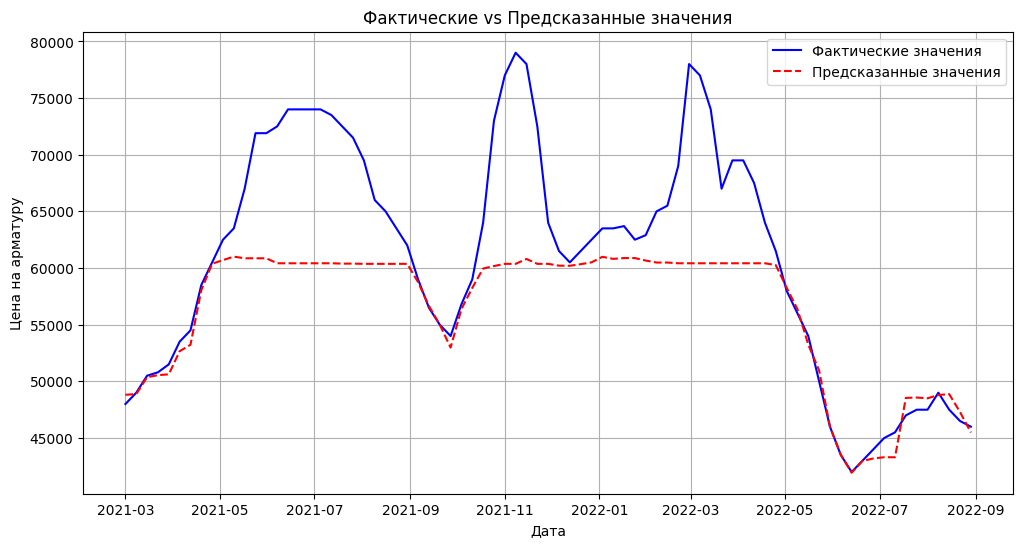

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Фактические значения", color="blue")
plt.plot(test.index, y_pred, label="Предсказанные значения", color="red", linestyle="dashed")
plt.xlabel("Дата")
plt.ylabel("Цена на арматуру")
plt.title("Фактические vs Предсказанные значения")
plt.legend()
plt.grid()
plt.show()
